In [1]:
from qbm_utils import *
from qiskit.quantum_info import Pauli
from qiskit.extensions import UGate, RZZGate

### Quantum enhanced MCMC implementation
Aim is to implement the circuit for implementing quantum enhanced MCMC

In [24]:
## put n_spins even always
n_spins = 6

## construct problem Hamiltonian ##
J = np.random.uniform(low= -1, high= 1, size= (n_spins, n_spins) )
J = 0.5 * (J + J.transpose() )
h = np.random.uniform(low= -1, high = 1, size= (n_spins))
model = IsingEnergyFunction(J, h)

alpha = np.sqrt(n_spins) / np.sqrt( sum([J[i][j]**2 for i in range(n_spins) for j in range(i)]) + sum([h[j]**2 for j in range(n_spins)])  )

In [25]:
spins = QuantumRegister(n_spins, name= 'spin')
creg_init = ClassicalRegister(n_spins, name= 'creg_0')
creg_final = ClassicalRegister(n_spins, name= 'creg_f')

qc = QuantumCircuit(spins, creg_init, creg_final)
qc.h(spins)
qc.barrier()

In [26]:
# # qc_i = qc.copy()
# qc.measure(spins, creg_init)
# qc.barrier()
# plot_histogram( execute(qc, shots= 1, backend= qsm).result().get_counts() )

In [27]:
num_trotter_steps = 10
for step in range(num_trotter_steps):
    append_evolution(qc, h, J, gamma= np.random.random(), alpha= alpha, time= 0.8)
append_evolution(qc, h, J, gamma= 0.1, alpha= alpha, time= 0.8, is_terminal_step= True)

In [28]:
# qc_i = qc.copy()
shots = 1000
qc.measure(spins, creg_final)
counts =  execute(qc, shots= shots, backend= qsm).result().get_counts() 

In [29]:
 transits_exp = dict( [ (item[0].split(' ')[0], item[1]/shots ) for item in counts.items() ] )
 transits_bltz = dict( [ ( state, model.get_boltzmann_prob(state) ) for state in transits_exp.keys() ] )

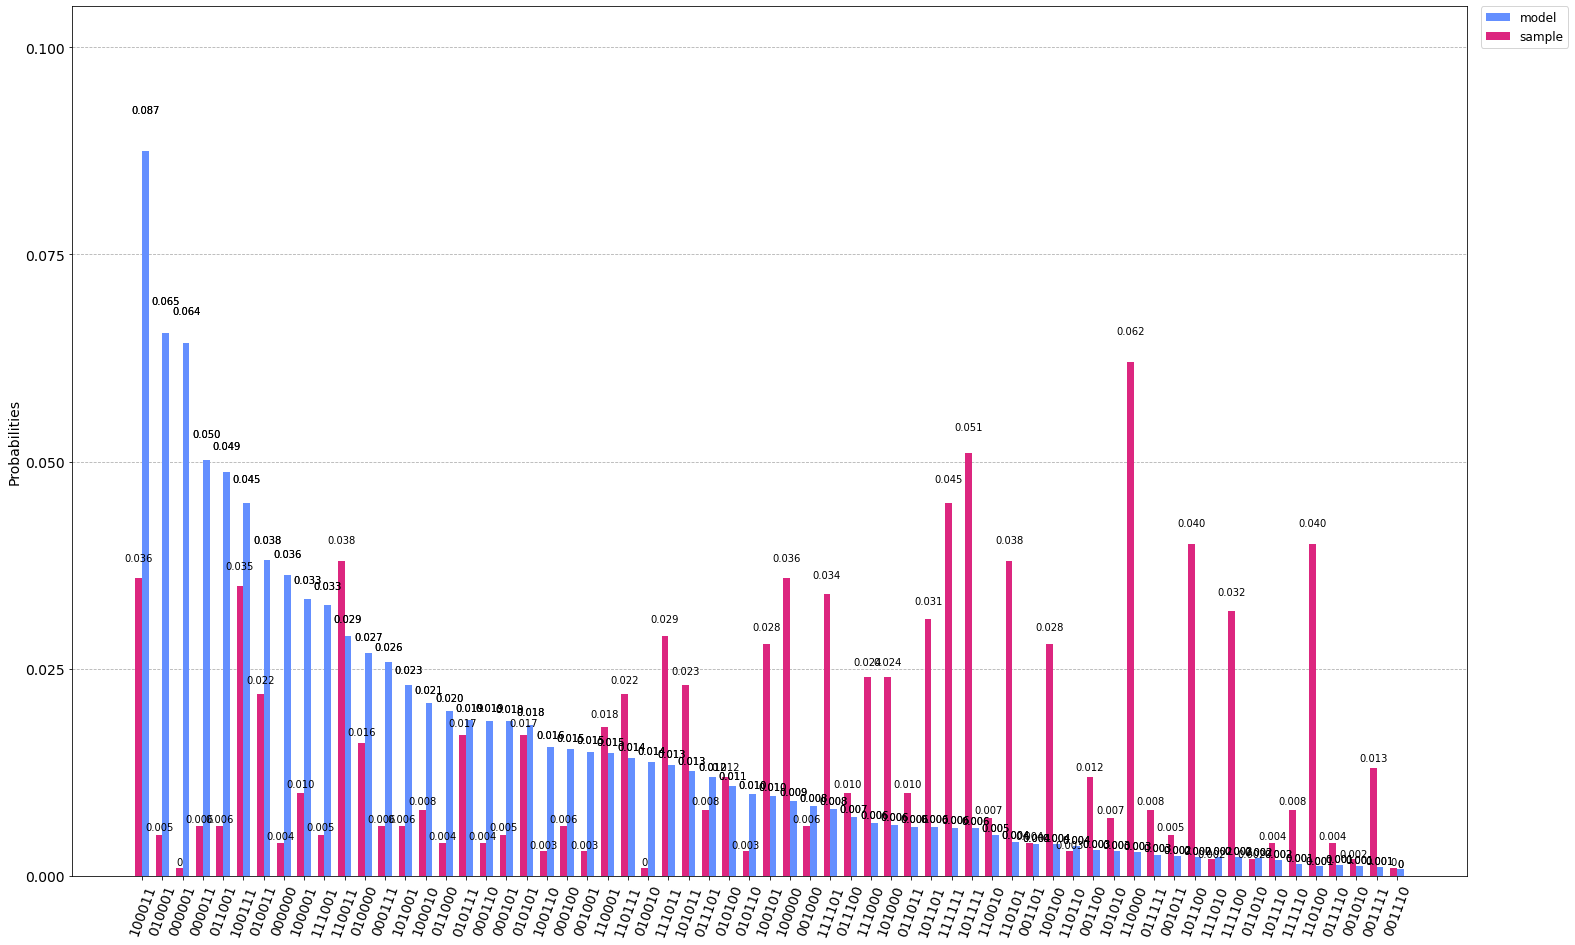

In [30]:
plot_histogram( [transits_bltz, transits_exp ] , figsize=(25, 16), sort= 'value_desc', legend= ['model', 'sample' ])